In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('../python'))
import decord as de

In [22]:
# using cpu in this example
ctx = de.cpu(0)
# using batchsize = 2 and smaller resolution in this example
shape = (2, 480, 640, 3)
# using kinetics example videos
videos = ['Javelin_standing_throw_drill.mkv', 'flipping_a_pancake.mkv']
# using in-batch frame interval 5
interval = 20
# using inter-batch frame interval 20, which means batch-batch interval is 20
skip = 50

In [23]:
# first see how sequential read looks like
vl = de.VideoLoader(videos, ctx=ctx, shape=shape, interval=interval, skip=skip, shuffle=0)
print('num batches:', len(vl))

num batches: 9


batch data shape: (2, 480, 640, 3)
batch data shape: (2, 480, 640, 3)
batch data shape: (2, 480, 640, 3)
batch data shape: (2, 480, 640, 3)
batch data shape: (2, 480, 640, 3)


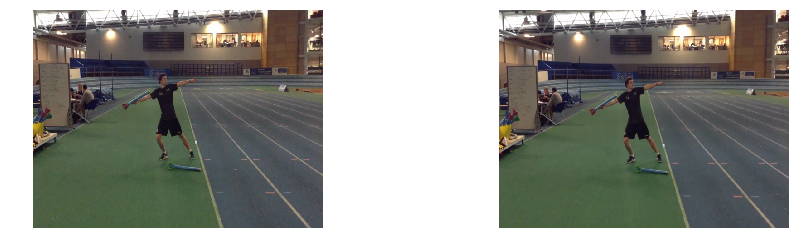

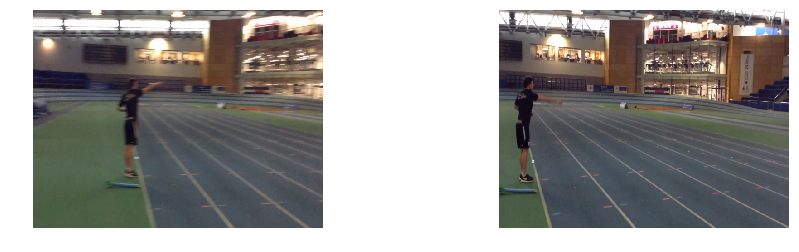

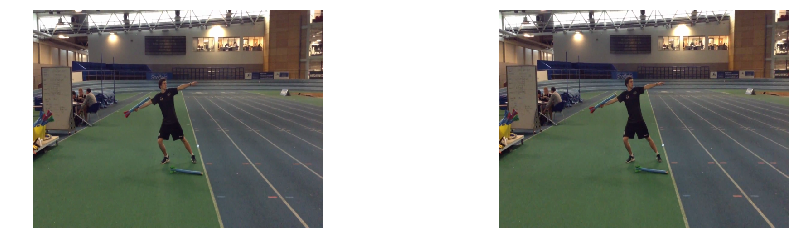

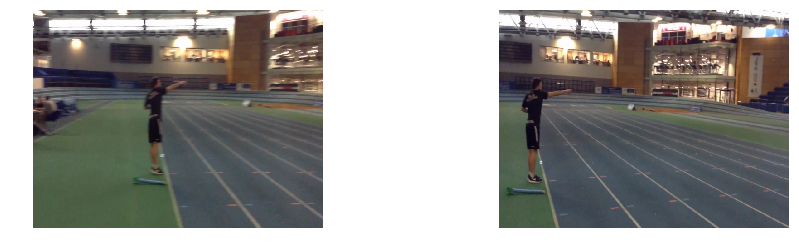

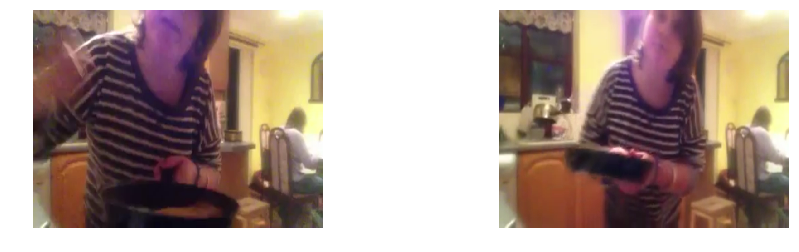

In [24]:
def disp_batches(video_loader, max_disp=5):
    %matplotlib inline
    from matplotlib import pyplot as plt
    import matplotlib.gridspec as gridspec
    cnt = 0
    vl.reset()
    for data in vl:
        if cnt >= max_disp:
            break
        print('batch data shape:', data.shape)
        b = data.asnumpy()
        columns = 4
        rows = max(1, (data.shape[0] + 1) // columns)
        fig = plt.figure(figsize = (32,(16 // columns) * rows))
        gs = gridspec.GridSpec(rows, columns)
        for i in range(data.shape[0]):
            plt.subplot(gs[i])
            plt.axis("off")
            plt.imshow(b[i])
        cnt += 1
disp_batches(vl, 5)

So video loader smoothly loaded batches from two videos, and let's shuffle the scenes

num batches: 9
batch data shape: (2, 240, 320, 3)
batch data shape: (2, 240, 320, 3)
batch data shape: (2, 240, 320, 3)
batch data shape: (2, 240, 320, 3)
batch data shape: (2, 240, 320, 3)


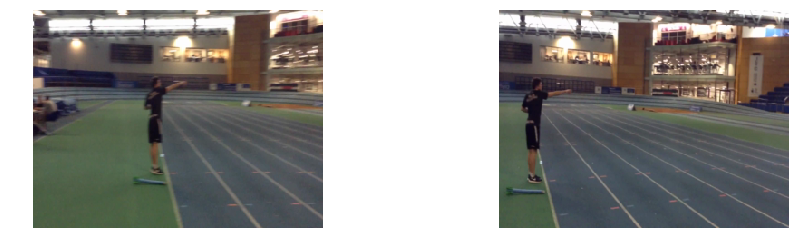

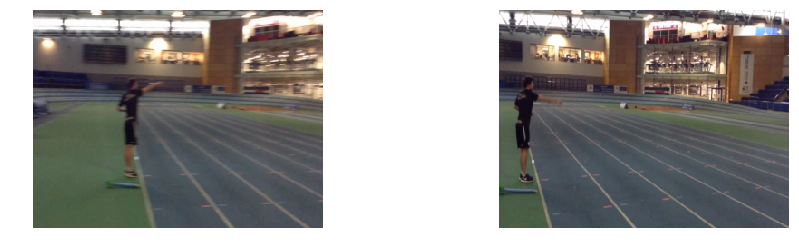

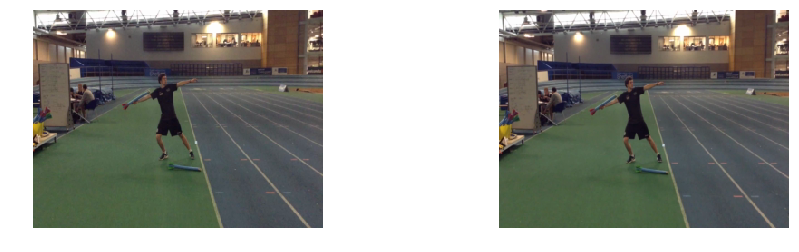

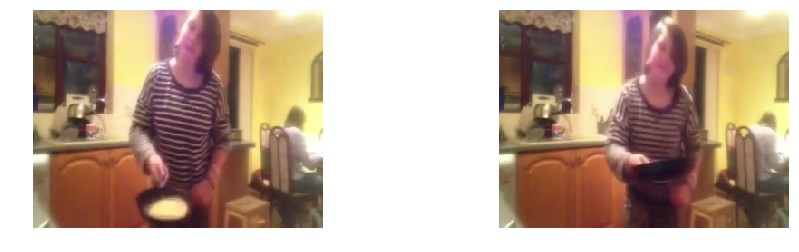

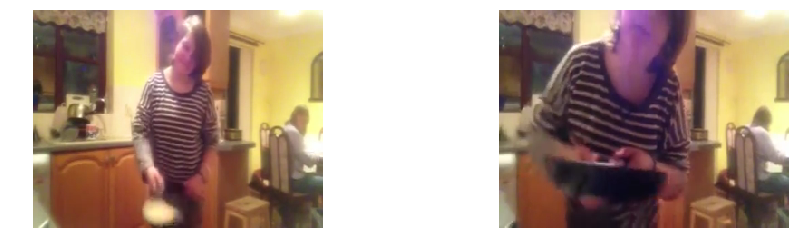

In [21]:
vl = de.VideoLoader(videos, ctx=ctx, shape=shape, interval=interval, skip=skip, shuffle=2)
print('num batches:', len(vl))
disp_batches(vl, 5)